Comparing predictions on unlabeled dataset `commits.csv` (possible to find it in the data folder) between the exact fasttext model of the paper (downloaded from the author github) and the Logit final model trained in the project.

In [1]:
import pandas as pd
from fasttext import load_model
import pickle

## Loading data and cleaning

In [2]:
df = pd.read_csv('../data/commits.csv',  lineterminator='\n', encoding="utf-8")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [3]:
%run ../scripts/text_data_preprocessing.ipynb

norm_corpus = preprocess(df['message'], cleaning = True, stemming = False, stem_type = None, 
                         lemmatization = True, remove_stopwords = True)
df['clean message'] = norm_corpus
# view data
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,message,clean message
0,Use github's new relative path format.,use github new relative path format
1,Fix conditional variance of LS estimate.\n\nIn...,fix conditional variance ls estimate 18 1 equa...
2,Merge pull request #8 from cortex/master\n\nSh...,merge pull request 8 cortex master share sql c...
3,Integrate Mathieu Bryen's pull request.,integrate mathieu bryen pull request
4,Merge branch 'master' of github.com:mavam/stat...,merge branch master github com mavam stat cook...
...,...,...
49995,10.6 build fix,10 6 build fix
49996,Don't delete beanstalkd.spec during distclean.,delete beanstalkd spec distclean
49997,Re-add bitcoin(32&80).xpm,add bitcoin 32 80 xpm
49998,fixed some ClassInfo bugs\n\nSummary:\nfor bet...,fix classinfo bug summary better reflection de...


## Predictions with Fasttext Model of the paper

In [4]:
fasttext_paper = load_model("../data/model.bin") #inserting fasttext_trained.bin is possible to predict with the fasttext model obtained in the project

In [5]:
labels = fasttext_paper.predict(df['clean message'].tolist())

In [6]:
labels=labels[0]
labels

[['__label__perfective'],
 ['__label__corrective'],
 ['__label__nonfunctional'],
 ['__label__nonfunctional'],
 ['__label__corrective'],
 ['__label__nonfunctional'],
 ['__label__perfective'],
 ['__label__perfective'],
 ['__label__features'],
 ['__label__corrective'],
 ['__label__perfective'],
 ['__label__perfective'],
 ['__label__perfective'],
 ['__label__corrective'],
 ['__label__corrective'],
 ['__label__corrective'],
 ['__label__perfective'],
 ['__label__features'],
 ['__label__features'],
 ['__label__features'],
 ['__label__unknown'],
 ['__label__perfective'],
 ['__label__corrective'],
 ['__label__perfective'],
 ['__label__corrective'],
 ['__label__features'],
 ['__label__features'],
 ['__label__unknown'],
 ['__label__features'],
 ['__label__perfective'],
 ['__label__corrective'],
 ['__label__features'],
 ['__label__features'],
 ['__label__corrective'],
 ['__label__corrective'],
 ['__label__perfective'],
 ['__label__corrective'],
 ['__label__features'],
 ['__label__features'],
 ['__

Now getting the predictions as a clean list of strings:

In [7]:
fasttxt_paper_pred=[]
for item in labels:
    fasttxt_paper_pred.append(item[0].replace("__label__",""))
fasttxt_paper_pred[:8]

['perfective',
 'corrective',
 'nonfunctional',
 'nonfunctional',
 'corrective',
 'nonfunctional',
 'perfective',
 'perfective']

## Predictions with Logit Model of the project

Loading the vectorizer (to featurize the messages) and the final model objects.

In [8]:
with open('../results/Classic_LR_final_model.pkl', 'rb') as fid:
    LR_model_final_project = pickle.load(fid)

with open('../results/vectorizer.pkl', 'rb') as fid:
    text_transformer = pickle.load(fid)

In [9]:
messages_featurized = text_transformer.transform(df['clean message'].tolist())
messages_featurized

<50000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 433046 stored elements in Compressed Sparse Row format>

In [10]:
logit_project_labels=LR_model_final_project.predict(messages_featurized)

In [11]:
logit_project_pred=logit_project_labels.tolist()
logit_project_pred

['perfective',
 'corrective',
 'nonfunctional',
 'nonfunctional',
 'corrective',
 'nonfunctional',
 'corrective',
 'perfective',
 'features',
 'corrective',
 'perfective',
 'nonfunctional',
 'corrective',
 'corrective',
 'corrective',
 'corrective',
 'perfective',
 'features',
 'perfective',
 'features',
 'corrective',
 'corrective',
 'corrective',
 'perfective',
 'corrective',
 'corrective',
 'features',
 'nonfunctional',
 'perfective',
 'features',
 'corrective',
 'features',
 'features',
 'corrective',
 'corrective',
 'perfective',
 'corrective',
 'features',
 'features',
 'corrective',
 'corrective',
 'corrective',
 'corrective',
 'perfective',
 'perfective',
 'features',
 'perfective',
 'features',
 'corrective',
 'corrective',
 'corrective',
 'corrective',
 'corrective',
 'corrective',
 'corrective',
 'corrective',
 'perfective',
 'perfective',
 'corrective',
 'nonfunctional',
 'perfective',
 'nonfunctional',
 'corrective',
 'corrective',
 'perfective',
 'perfective',
 'perfectiv

## Comparing the predictions

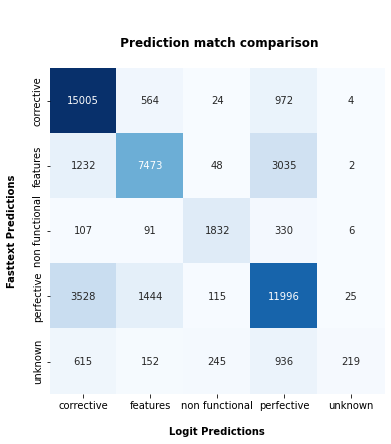

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(fasttxt_paper_pred, logit_project_pred)

fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt="d") #Annotate each cell with the numeric value using integer formatting
ax.set_title('\n\n Prediction match comparison\n', fontweight='bold');
ax.set_xlabel('\nLogit Predictions',fontweight='bold')
ax.set_ylabel('Fasttext Predictions\n',fontweight='bold');
ax.xaxis.set_ticklabels(['corrective', 'features', 'non functional', 'perfective', 'unknown']);
ax.yaxis.set_ticklabels(['corrective', 'features', 'non functional', 'perfective', 'unknown']);
plt.savefig('../figures/prediction_match_comparison_unlabelled')

In [13]:
len(fasttxt_paper_pred) == len(logit_project_pred)

True

In [14]:
match=0
for i in range(len(fasttxt_paper_pred)):
    if fasttxt_paper_pred[i] == logit_project_pred[i]:
        match=match+1
print("predictions match %:", match/50000)

predictions match %: 0.7305
